In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [5]:
with tf.Session() as sess:
    x_vals = np.linspace(0, 10, 100)
    y_vals = x_vals  + np.random.normal(0, 1, 100)
    
    x_vals_column = np.transpose(np.matrix(x_vals))
    ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
    A = np.column_stack((x_vals_column, ones_column))
    b = np.transpose(np.matrix(y_vals))
    
    A_tensor = tf.constant(A)
    b_tensor = tf.constant(b)
    
    tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
    tA_A_inv = tf.matrix_inverse(tA_A)
    product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
    solution = tf.matmul(product, b_tensor)
    solution_eval = sess.run(solution)

In [6]:
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope:', slope)
print('y_intercept:', y_intercept)

slope: 1.007596152854314
y_intercept: -0.014866112220011302


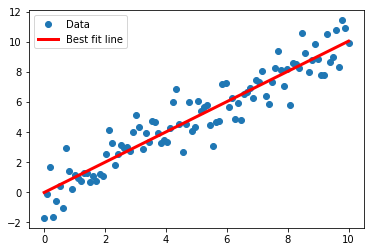

In [7]:
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)

plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()